### Import Libraries

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

### Data Input and Pre-Processing

In [19]:
df = pd.read_csv("../data/Canada_CO2_Emissions_per_Capita.csv")
df.head()

,Entity,Year,Per capita CO2‚ emissions (tonnes per capita),Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Canada,1800,0.005676,NaN,NaN,NaN
1,Canada,1801,0.005610,NaN,NaN,NaN
2,Canada,1802,0.005545,NaN,NaN,NaN
3,Canada,1803,0.005480,NaN,NaN,NaN
4,Canada,1804,0.005416,NaN,NaN,NaN


In [20]:
df['Year'] = df['Year'].astype(float)
df['Per capita CO2‚ emissions (tonnes per capita)'] = df['Per capita CO2‚ emissions (tonnes per capita)'].astype(float)

In [21]:
cdf = df[['Year', 'Per capita CO2‚ emissions (tonnes per capita)']]
cdf.head()

,Year,Per capita CO2‚ emissions (tonnes per capita)
0,1800.0,0.005676
1,1801.0,0.005610
2,1802.0,0.005545
3,1803.0,0.005480
4,1804.0,0.005416


In [22]:
split = int(len(df) * 0.8)
print(split)
train = df[0:split]
test = df[split + 1:]

174


In [23]:
train_X, train_Y = np.array(train[['Year']]), np.array(train[['Per capita CO2‚ emissions (tonnes per capita)']])

In [24]:
test_X, test_Y = np.array(test[['Year']]), np.array(test[['Per capita CO2‚ emissions (tonnes per capita)']])

Text(0, 0.5, 'CO2 Emissions Per Capita (tonnes per capita)')

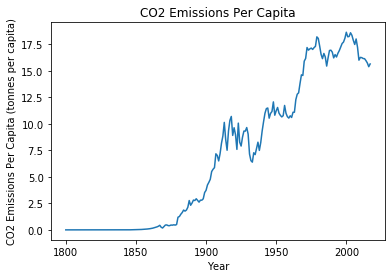

In [25]:
#Plotting the entire dataset
plt.plot(df['Year'], df['Per capita CO2‚ emissions (tonnes per capita)'])
plt.title('CO2 Emissions Per Capita')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Per Capita (tonnes per capita)')

### Linear Regression Model

In [26]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (train_X, train_Y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[0.09070663]]
Intercept:  [-166.6742893]


### SVM Model

In [27]:
from sklearn.svm import SVR
clf = SVR(kernel='poly', gamma='scale', C=1.0, epsilon=0.2)
clf.fit(train_X, train_Y) 

C:\Users\tarek\AppData\Local\Continuum\anaconda3\envs\tf-gpu-new\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Gaussian Process Regression Model

In [28]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(train_X, train_Y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

### Decision Tree Regression with AdaBoost Model

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

adboost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)

adboost.fit(train_X,train_Y)

C:\Users\tarek\AppData\Local\Continuum\anaconda3\envs\tf-gpu-new\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

### Evaluating Linear Regression Model

In [30]:
#Linear Regression
from sklearn import metrics

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

linear_regr_y_pred = regr.predict(test_X)
linear_rmse = np.sqrt(metrics.mean_squared_error(test_Y, linear_regr_y_pred))
linear_mse = metrics.mean_squared_error(test_Y, linear_regr_y_pred)
linear_mape = mean_absolute_percentage_error(test_Y, linear_regr_y_pred)
print ("RMSE: ", linear_rmse) #RMSE
print ("MSE: ", linear_mse) #MSE
print ("MAPE: ", linear_mape) #MAPE

RMSE:  3.011038400949402
MSE:  9.06635225199193
MAPE:  15.485216803397453


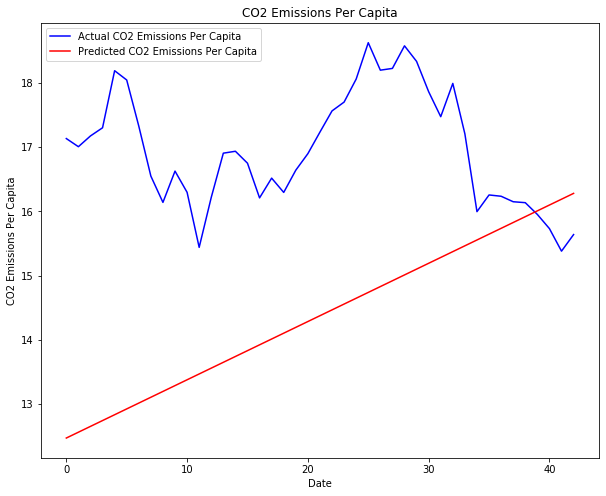

In [31]:
plt.figure(figsize=(10,8))
plt.plot(test_Y, color='blue', label='Actual CO2 Emissions Per Capita')
plt.plot(linear_regr_y_pred , color='red', label='Predicted CO2 Emissions Per Capita')
plt.title('CO2 Emissions Per Capita')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions Per Capita')
plt.legend()
plt.show()

Text(0, 0.5, 'MSE Errors')

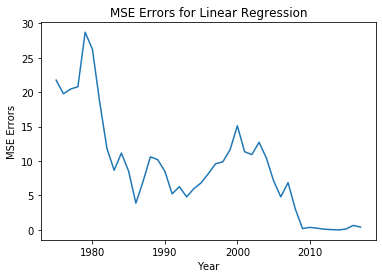

In [32]:
linear_MSE_values =[]

for i in range(len(test_Y)):
    linear_MSE_values.append(metrics.mean_squared_error(test_Y[i], linear_regr_y_pred[i]))

plt.plot(test_X, linear_MSE_values)
plt.title('MSE Errors for Linear Regression')
plt.xlabel('Year')
plt.ylabel('MSE Errors')

Text(0, 0.5, 'RMSE Errors')

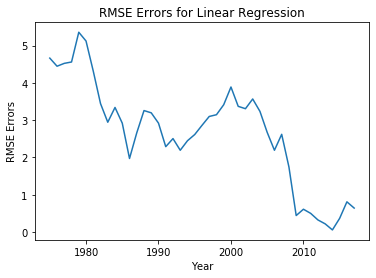

In [33]:
linear_RMSE_values =[]

for i in range(len(test_Y)):
    linear_RMSE_values.append(np.sqrt(metrics.mean_squared_error(test_Y[i], linear_regr_y_pred[i])))

plt.plot(test_X, linear_RMSE_values)
plt.title('RMSE Errors for Linear Regression')
plt.xlabel('Year')
plt.ylabel('RMSE Errors')

Text(0, 0.5, 'MAPE Errors')

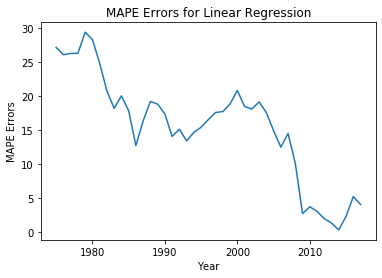

In [34]:
linear_MAPE_values =[]

for i in range(len(test_Y)):
    linear_MAPE_values.append(mean_absolute_percentage_error(test_Y[i], linear_regr_y_pred[i]))

plt.plot(test_X, linear_MAPE_values)
plt.title('MAPE Errors for Linear Regression')
plt.xlabel('Year')
plt.ylabel('MAPE Errors')

### Evaluating Gaussian Process Regression Model

In [35]:
gp_y_pred = gp.predict(test_X)

gp_rmse = np.sqrt(metrics.mean_squared_error(test_Y, gp_y_pred))
gp_mse = metrics.mean_squared_error(test_Y, gp_y_pred)
gp_mape = mean_absolute_percentage_error(test_Y, gp_y_pred)
print ("RMSE: ", gp_rmse) #RMSE
print ("MSE: ", gp_mse) #MSE
print ("MAPE: ", gp_mape) #MAPE

RMSE:  16.980645835092762
MSE:  288.34233297685313
MAPE:  100.0


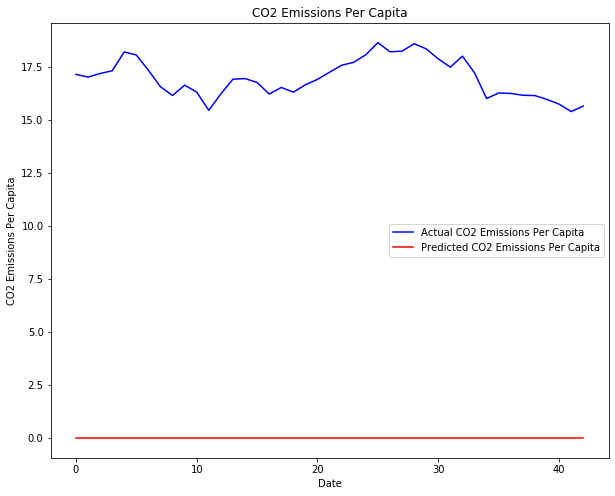

In [36]:
plt.figure(figsize=(10,8))
plt.plot(test_Y, color='blue', label='Actual CO2 Emissions Per Capita')
plt.plot(gp_y_pred , color='red', label='Predicted CO2 Emissions Per Capita')
plt.title('CO2 Emissions Per Capita')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions Per Capita')
plt.legend()
plt.show()

Text(0, 0.5, 'MSE Errors')

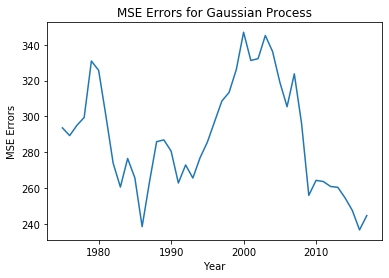

In [37]:
gp_MSE_values =[]

for i in range(len(test_Y)):
    gp_MSE_values.append(metrics.mean_squared_error(test_Y[i], gp_y_pred[i]))

plt.plot(test_X, gp_MSE_values)
plt.title('MSE Errors for Gaussian Process')
plt.xlabel('Year')
plt.ylabel('MSE Errors')

Text(0, 0.5, 'RMSE Errors')

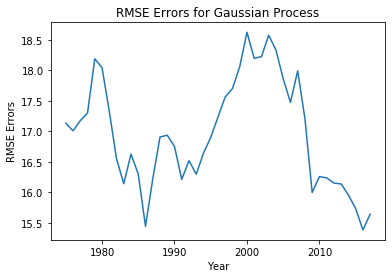

In [38]:
gp_RMSE_values =[]

for i in range(len(test_Y)):
    gp_RMSE_values.append(np.sqrt(metrics.mean_squared_error(test_Y[i], gp_y_pred[i])))

plt.plot(test_X, gp_RMSE_values)
plt.title('RMSE Errors for Gaussian Process')
plt.xlabel('Year')
plt.ylabel('RMSE Errors')

Text(0, 0.5, 'MAPE Errors')

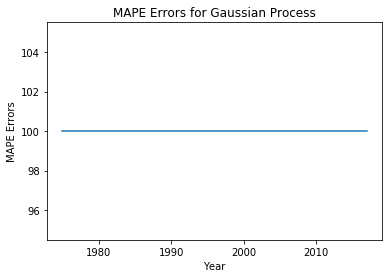

In [39]:
gp_MAPE_values =[]

for i in range(len(test_Y)):
    gp_MAPE_values.append(mean_absolute_percentage_error(test_Y[i], gp_y_pred[i]))

plt.plot(test_X, gp_MAPE_values)
plt.title('MAPE Errors for Gaussian Process')
plt.xlabel('Year')
plt.ylabel('MAPE Errors')

### Evaluating SVM Model

In [40]:
svr_y_pred = clf.predict(test_X)

svr_rmse = np.sqrt(metrics.mean_squared_error(test_Y, svr_y_pred))
svr_mse = metrics.mean_squared_error(test_Y, svr_y_pred)
svr_mape = mean_absolute_percentage_error(test_Y, svr_y_pred)
print ("RMSE: ", svr_rmse) #RMSE
print ("MSE: ", svr_mse) #MSE
print ("MAPE: ", svr_mape) #MAPE

RMSE:  588.4955825491843
MSE:  346327.05067990377
MAPE:  3472.854705645993


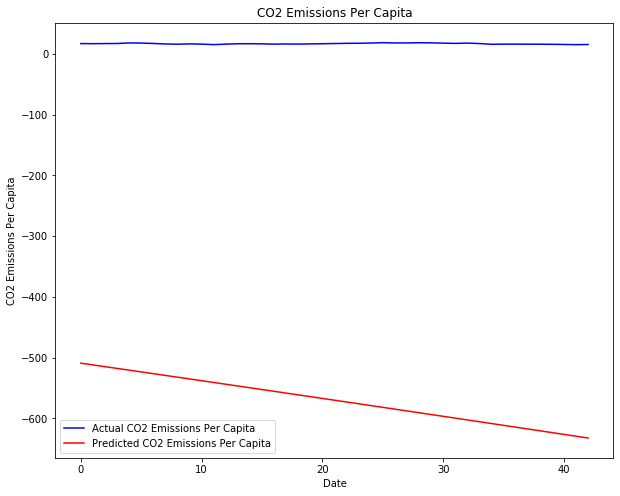

In [41]:
plt.figure(figsize=(10,8))
plt.plot(test_Y, color='blue', label='Actual CO2 Emissions Per Capita')
plt.plot(svr_y_pred , color='red', label='Predicted CO2 Emissions Per Capita')
plt.title('CO2 Emissions Per Capita')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions Per Capita')
plt.legend()
plt.show()

### Evaluating Decision Tree Regression with AdaBoost Model

In [42]:
adboost_y_pred = adboost.predict(test_X)

adboost_rmse = np.sqrt(metrics.mean_squared_error(test_Y, adboost_y_pred))
adboost_mse = metrics.mean_squared_error(test_Y, adboost_y_pred)
adboost_mape = mean_absolute_percentage_error(test_Y, adboost_y_pred)
print ("RMSE: ", adboost_rmse) #RMSE
print ("MSE: ", adboost_mse) #MSE
print ("MAPE: ", adboost_mape) #MAPE

RMSE:  0.8830148716508337
MSE:  0.7797152635565383
MAPE:  4.407519155456077


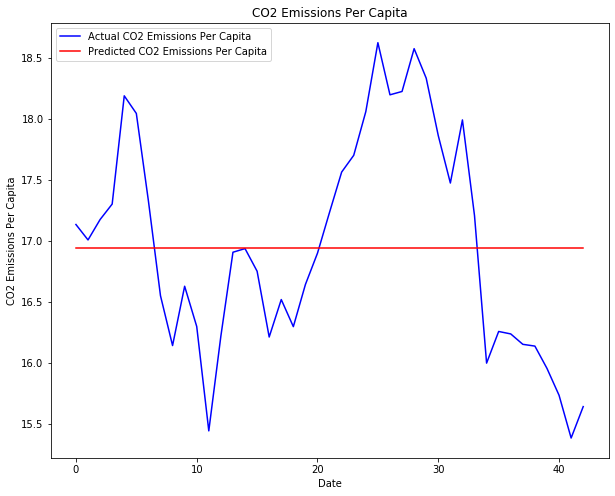

In [43]:
plt.figure(figsize=(10,8))
plt.plot(test_Y, color='blue', label='Actual CO2 Emissions Per Capita')
plt.plot(adboost_y_pred , color='red', label='Predicted CO2 Emissions Per Capita')
plt.title('CO2 Emissions Per Capita')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions Per Capita')
plt.legend()
plt.show()

In [44]:
from tabulate import tabulate
print(tabulate([['Linear Regression', linear_mse, linear_rmse, linear_mape], ['SVR', svr_mse, svr_rmse, svr_mape], ['Gaussian Process', gp_mse, gp_rmse, gp_mape], ['Decision Tree', adboost_mse, adboost_rmse, adboost_mape]], headers=['Method', 'MSE Value', 'RMSE Value', 'MAPE Value']))

Method                 MSE Value    RMSE Value    MAPE Value
-----------------  -------------  ------------  ------------
Linear Regression       9.06635       3.01104       15.4852
SVR                346327           588.496       3472.85
Gaussian Process      288.342        16.9806       100
Decision Tree           0.779715      0.883015       4.40752


In [45]:
print('Min MSE: ', min(linear_mse, svr_mse, gp_mse, adboost_mse))
print('Min RMSE: ', min(linear_rmse, svr_rmse, gp_rmse, adboost_rmse))
print('Min MAPE: ', min(linear_mape, svr_mape, gp_mape, adboost_mape))

Min MSE:  0.7797152635565383
Min RMSE:  0.8830148716508337
Min MAPE:  4.407519155456077


### Visualize All Models Forecasting Predictions

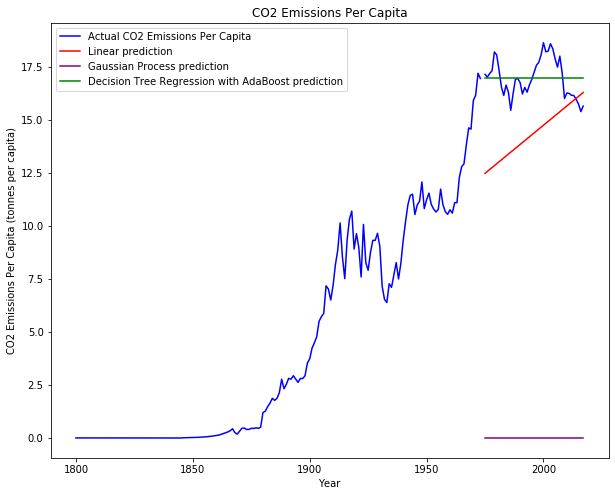

In [46]:
plt.figure(figsize=(10,8))
plt.plot(train_X, train_Y, color='blue', label='Actual CO2 Emissions Per Capita')
plt.plot(test_X, test_Y, color='blue')
plt.plot(test_X, linear_regr_y_pred, color='red', label='Linear prediction')
#plt.plot(test_X,svr_y_pred, color='orange', label='SVR prediction')
plt.plot(test_X,gp_y_pred, color='purple', label='Gaussian Process prediction')
plt.plot(test_X,adboost_y_pred, color='green', label='Decision Tree Regression with AdaBoost prediction')
plt.title('CO2 Emissions Per Capita')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Per Capita (tonnes per capita)')
plt.legend()
plt.show()